# W12 - Exercise

use the dataset __healthcare_dataset__ for this exercise

Column details: <br>
- **Name**: This column represents the name of the patient associated with the healthcare record. <br>
- **Age**: The age of the patient at the time of admission, expressed in years. <br>
- **Gender**: Indicates the gender of the patient, either "Male" or "Female."<br>
- **Blood** Type: The patient's blood type, which can be one of the common blood types (e.g., "A+", "O-", etc.).<br>
- **Medical** Condition: This column specifies the primary medical condition or diagnosis associated with the patient, such as "Diabetes," "Hypertension," "Asthma," and more.<br>
- **Date of Admission**: The date on which the patient was admitted to the healthcare facility.<br>
- **Doctor**: The name of the doctor responsible for the patient's care during their admission.<br>
- **Hospital**: Identifies the healthcare facility or hospital where the patient was admitted.<br>
- **Insurance Provider**: This column indicates the patient's insurance provider, which can be one of several options, including "Aetna," "Blue Cross," "Cigna," "UnitedHealthcare," and "Medicare."<br>
- **Billing Amount**: The amount of money billed for the patient's healthcare services during their admission. This is expressed as a floating-point number.<br>
- **Room Number**: The room number where the patient was accommodated during their admission.<br>
- **Admission Type**: Specifies the type of admission, which can be "Emergency," "Elective," or "Urgent," reflecting the circumstances of the admission.<br>
- **Discharge Date**: The date on which the patient was discharged from the healthcare facility, based on the admission date and a random number of days within a realistic range.<br>
- **Medication**: Identifies a medication prescribed or administered to the patient during their admission. Examples include "Aspirin," "Ibuprofen," "Penicillin," "Paracetamol," and "Lipitor."<br>
- **Test Results**: Describes the results of a medical test conducted during the patient's admission. Possible values include "Normal," "Abnormal," or "Inconclusive," indicating the outcome of the test.<br>

This exercise is applicable to multiple machine learning algorithms. Create EDA to visualize data and results and explore as far as you can.
Task:
1. Data Cleaning, Transformation
2. Visualization (EDA)
3. Use at least one machine learning techniques (Regression, Classification, Clustering)
4. Use different modelling algorithm to compare results (XGBoost, KNN, Hierarchical, Apriori, Linear, Logistic, etc)

This exercise is to test your willingness to explore, critical thinking and the knowledge when to use what algorithms to achieve a purpose. 

### Import Library

In [130]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import silhouette_score

### Load Dataset

In [176]:
dataset = 'C:/Users/Fahrizal Dwi Rinaldi/Downloads/Semester 5/Data Mining/W12/healthcare_dataset.csv'
df = pd.read_csv(dataset, sep=',')
df.head()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Tiffany Ramirez,81,Female,O-,Diabetes,2022-11-17,Patrick Parker,Wallace-Hamilton,Medicare,37490.983364,146,Elective,2022-12-01,Aspirin,Inconclusive
1,Ruben Burns,35,Male,O+,Asthma,2023-06-01,Diane Jackson,"Burke, Griffin and Cooper",UnitedHealthcare,47304.064845,404,Emergency,2023-06-15,Lipitor,Normal
2,Chad Byrd,61,Male,B-,Obesity,2019-01-09,Paul Baker,Walton LLC,Medicare,36874.896997,292,Emergency,2019-02-08,Lipitor,Normal
3,Antonio Frederick,49,Male,B-,Asthma,2020-05-02,Brian Chandler,Garcia Ltd,Medicare,23303.322092,480,Urgent,2020-05-03,Penicillin,Abnormal
4,Mrs. Brandy Flowers,51,Male,O-,Arthritis,2021-07-09,Dustin Griffin,"Jones, Brown and Murray",UnitedHealthcare,18086.344184,477,Urgent,2021-08-02,Paracetamol,Normal


### Data Cleaning, Transform

In [177]:
cekDUplikat = df.duplicated().any()
cekDUplikat

False

In [178]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                10000 non-null  object 
 1   Age                 10000 non-null  int64  
 2   Gender              10000 non-null  object 
 3   Blood Type          10000 non-null  object 
 4   Medical Condition   10000 non-null  object 
 5   Date of Admission   10000 non-null  object 
 6   Doctor              10000 non-null  object 
 7   Hospital            10000 non-null  object 
 8   Insurance Provider  10000 non-null  object 
 9   Billing Amount      10000 non-null  float64
 10  Room Number         10000 non-null  int64  
 11  Admission Type      10000 non-null  object 
 12  Discharge Date      10000 non-null  object 
 13  Medication          10000 non-null  object 
 14  Test Results        10000 non-null  object 
dtypes: float64(1), int64(2), object(12)
memory usage: 1.1+

In [179]:
df.isna().any()

Name                  False
Age                   False
Gender                False
Blood Type            False
Medical Condition     False
Date of Admission     False
Doctor                False
Hospital              False
Insurance Provider    False
Billing Amount        False
Room Number           False
Admission Type        False
Discharge Date        False
Medication            False
Test Results          False
dtype: bool

In [180]:
print((df==0).sum())

Name                  0
Age                   0
Gender                0
Blood Type            0
Medical Condition     0
Date of Admission     0
Doctor                0
Hospital              0
Insurance Provider    0
Billing Amount        0
Room Number           0
Admission Type        0
Discharge Date        0
Medication            0
Test Results          0
dtype: int64


In [181]:
df = df.drop(['Name','Date of Admission', 'Discharge Date','Doctor','Hospital','Insurance Provider','Billing Amount','Room Number','Admission Type',], axis=1)
columns_to_encode = ['Gender', 'Blood Type', 'Medical Condition', 'Medication']
for column in columns_to_encode:
    df[column] = LabelEncoder().fit_transform(df[column])

df


,Age,Gender,Blood Type,Medical Condition,Medication,Test Results
0,81,0,7,3,0,Inconclusive
1,35,1,6,1,2,Normal
2,61,1,5,5,2,Normal
3,49,1,5,1,4,Abnormal
4,51,1,7,0,3,Normal
...,...,...,...,...,...,...
9995,83,1,0,5,1,Abnormal
9996,47,0,2,0,1,Normal
9997,54,1,5,0,1,Normal
9998,84,1,0,0,4,Normal


### 2. Visualization (EDA)

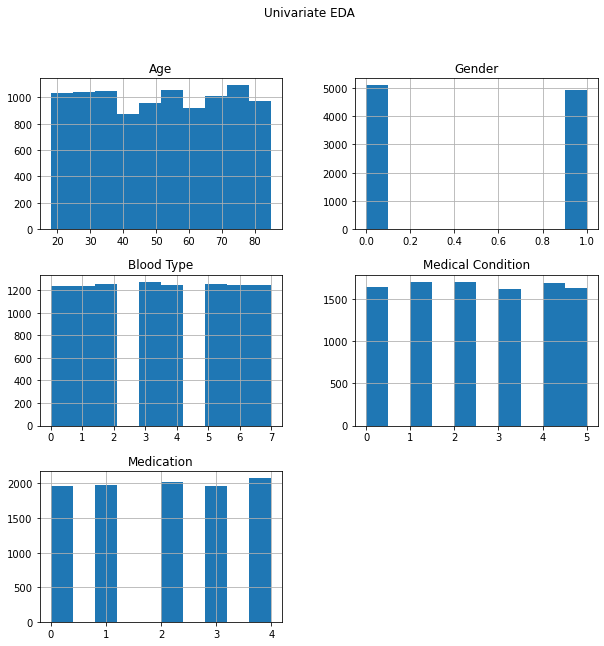

In [182]:
df.describe()
df.hist(figsize=(10,10))
plt.suptitle("Univariate EDA")
plt.show()

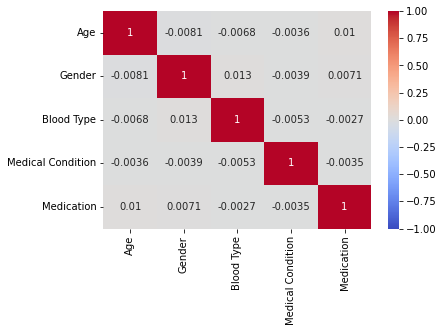

In [183]:
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.show()

#### Machne Learning Techniques : Classification - Logistic Regression

In [184]:
X = df.drop("Test Results", axis=1)
y = df["Test Results"]

In [185]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 0)


In [186]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)

X_test_scaled = scaler.transform(X_test)

In [187]:
Logreg = LogisticRegression(random_state=0)
Logreg.fit(X_train_scaled, y_train)

LogisticRegression(random_state=0)

In [188]:
ypred = Logreg.predict(X_test_scaled)
print(ypred)

['Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Inconclusive' 'Normal'
 'Inconclusive' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal'
 'Inconclusive' 'Normal' 'Abnormal' 'Abnormal' 'Normal' 'Abnormal'
 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal'
 'Abnormal' 'Normal' 'Abnormal' 'Abnormal' 'Inconclusive' 'Abnormal'
 'Normal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal'
 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Normal' 'Abnormal' 'Normal'
 'Abnormal' 'Abnormal' 'Abnormal' 'Normal' 'Normal' 'Normal' 'Normal'
 'Inconclusive' 'Abnormal' 'Inconclusive' 'Inconclusive' 'Abnormal'
 'Normal' 'Abnormal' 'Abnormal' 'Normal' 'Abnormal' 'Abnormal' 'Normal'
 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Inconclusive'
 'Normal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal'
 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Inconclusive' 'Abnormal'
 'Normal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal'
 'Abnormal' 'Abnormal' 'Abnormal' 'A

In [189]:
ConMat = confusion_matrix(y_test,ypred)
print("Confusion Matrix \n", ConMat)

accuracy = accuracy_score(y_test,ypred)
print("Accuracy Score: ", accuracy)

Confusion Matrix 
 [[255  40  47]
 [257  38  34]
 [262  27  40]]
Accuracy Score:  0.333


### Model Comparison : Classification - KNN

In [190]:
modelKNN = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
modelKNN.fit(X_train_scaled, y_train)

KNeighborsClassifier(metric='euclidean')

In [191]:
ypredKNN = modelKNN.predict(X_test_scaled)
print(ypred)

['Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Inconclusive' 'Normal'
 'Inconclusive' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal'
 'Inconclusive' 'Normal' 'Abnormal' 'Abnormal' 'Normal' 'Abnormal'
 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal'
 'Abnormal' 'Normal' 'Abnormal' 'Abnormal' 'Inconclusive' 'Abnormal'
 'Normal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal'
 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Normal' 'Abnormal' 'Normal'
 'Abnormal' 'Abnormal' 'Abnormal' 'Normal' 'Normal' 'Normal' 'Normal'
 'Inconclusive' 'Abnormal' 'Inconclusive' 'Inconclusive' 'Abnormal'
 'Normal' 'Abnormal' 'Abnormal' 'Normal' 'Abnormal' 'Abnormal' 'Normal'
 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Inconclusive'
 'Normal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal'
 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Inconclusive' 'Abnormal'
 'Normal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal'
 'Abnormal' 'Abnormal' 'Abnormal' 'A

In [192]:
ConMat = confusion_matrix(y_test,ypredKNN)
print("Confusion Matrix \n", ConMat)

accuracy = accuracy_score(y_test,ypredKNN)
print("Accuracy Score: ", accuracy)

Confusion Matrix 
 [[151 133  58]
 [168  96  65]
 [167  88  74]]
Accuracy Score:  0.321


### Machne Learning Techniques : K-Means Clustering

In [193]:
df['Test Results'] = LabelEncoder().fit_transform(df['Test Results'])

In [194]:
dfs = StandardScaler().fit_transform(df)
dfs = pd.DataFrame(dfs, columns=["Age","Gender","Blood Type","Medical Condition","Medication","Test Result"])
dfs.head()

,Age,Gender,Blood Type,Medical Condition,Medication,Test Result
0,1.508465,-0.985111,1.530606,0.301166,-1.424595,0.023057
1,-0.839912,1.015114,1.093153,-0.874117,-0.014663,1.242984
2,0.487431,1.015114,0.655699,1.476449,-0.014663,1.242984
3,-0.125189,1.015114,0.655699,-0.874117,1.395268,-1.196870
4,-0.023086,1.015114,1.530606,-1.461758,0.690302,1.242984


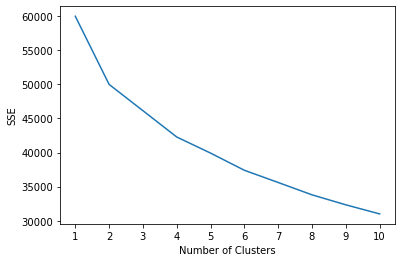

In [195]:
kmeans_params = { "init": "random", "n_init": 10,"max_iter": 300,
                 "random_state": 42,}

SSE = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_params)
    kmeans.fit(dfs)
    SSE.append(kmeans.inertia_)

plt.plot(range(1, 11), SSE)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [196]:
from kneed import KneeLocator
findknee = KneeLocator(range(1, 11), SSE, curve="convex", direction="decreasing")
print('the best k for your model is ', findknee.elbow)

the best k for your model is  4


In [197]:
kmeans = KMeans(n_init=3 , n_clusters=4, max_iter=300, random_state=42)
ykmeans= kmeans.fit_predict(dfs)
df['K-Means']= ykmeans

In [198]:
df.groupby('K-Means').agg(Age = ('Age', 'mean'), Gender = ('Gender', pd.Series.mode), BloodType = ('Blood Type', 'mean'), MedicalCondition = ('Medical Condition', 'mean'), Medication = ('Medication', 'mean'), TestResult = ('Test Results', 'mean'))


,Age,Gender,BloodType,MedicalCondition,Medication,TestResult
K-Means,,,,,,
0,45.778311,0,3.437375,2.613445,1.921569,1.665466
1,57.370814,1,3.593220,2.408847,2.069450,1.663084
2,45.422586,1,3.469673,2.550279,1.994014,0.305666
3,57.264363,0,3.506988,2.378106,2.097438,0.333851


### Model Comparison : Hierarchical Clustering

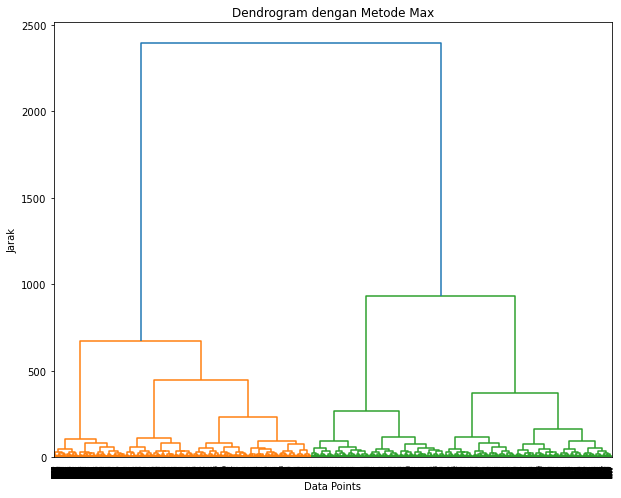

In [200]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

data_for_dendrogram = df.drop('K-Means', axis=1) 

linkage_matrix = linkage(data_for_dendrogram, method='ward', metric='euclidean')

plt.figure(figsize=(10, 8))
dendrogram(linkage_matrix, orientation='top', p=30, truncate_mode='level', show_leaf_counts=True)
plt.title('Dendrogram dengan Metode Max')
plt.xlabel('Data Points')
plt.ylabel('Jarak')
plt.show()

In [201]:
from scipy.cluster.hierarchy import fcluster
from scipy.cluster.hierarchy import linkage

num_clusters_hierarchical = 4 

linkage_matrix = linkage(data_for_dendrogram, method='ward', metric='euclidean')

cluster_labels = fcluster(linkage_matrix, num_clusters_hierarchical, criterion='maxclust')

df['Hierarchical_Cluster'] = cluster_labels

In [202]:
df.groupby('Hierarchical_Cluster').agg(Age = ('Age', 'mean'), Gender = ('Gender', pd.Series.mode), BloodType = ('Blood Type', 'mean'), MedicalCondition = ('Medical Condition', 'mean'), Medication = ('Medication', 'mean'), TestResult = ('Test Results', 'mean'))


,Age,Gender,BloodType,MedicalCondition,Medication,TestResult
Hierarchical_Cluster,,,,,,
1,21.862822,0,3.614965,2.628215,1.879969,0.971161
2,37.503452,0,3.388772,2.419994,2.079255,0.972381
3,77.129946,0,3.526447,2.539775,2.063723,0.993336
4,59.081742,0,3.557119,2.460302,1.981575,0.985260
